In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 异常检测(Anomaly Detection)

异常检测(Anomaly detection)是机器学习算法的一个常见应用。这种算法的一个有趣之处在于：它虽然主要用于非监督学习问题，但从某些角度看，它又类似于一些监督学习问题。

- 异常检测经常用来识别欺骗。例如在线采集而来的有关用户的数据，一个特征向量中可能会包含如：用户多久登录一次，访问过的页面，在论坛发布的帖子数量，甚至是打字速度等。尝试根据这些特征构建一个模型，可以用这个模型来识别那些不符合该模式的用户。

- 再一个例子是检测一个数据中心，特征可能包含：内存使用情况，被访问的磁盘数量，CPU的负载，网络的通信量等。根据这些特征可以构建一个模型，用来判断某些计算机是不是有可能出错了。

## 异常检测的密度函数：
对于一个数据点 $ x $，其概率密度函数 $ p(x) $ 可以用来判断该点是否为异常：

$
\begin{cases} 
\text{anomaly} & \text{if } p(x) < \varepsilon \\ 
\text{normal} & \text{if } p(x) \geq \varepsilon 
\end{cases}
$

### 模型构建的外观：
假设 $ x^{(i)} $ 是用来构建模型的数据点集合，那么 $ \vec{x} = (x_1, x_2, \ldots, x_m) $ 可以是这些数据点。

### 注明：
- $ \varepsilon $ 是异常检测的阈值。
- 特征变量如 $ z_1 $ 和 $ z_2 $ 可以是一个飞机引擎检测模型中的两个具体的参数，比如“产生的热量”和“振动强度”。

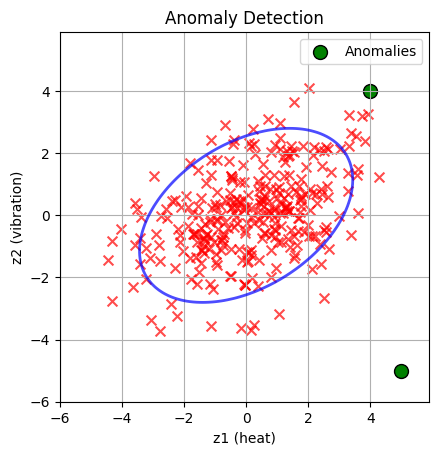

In [3]:
from scipy.stats import multivariate_normal

# 生成随机正态分布数据
np.random.seed(0)
mu = [0, 0]  # 均值
cov = [[3, 1], [1, 2]]  # 协方差矩阵
data = np.random.multivariate_normal(mu, cov, 300)

# 根据训练数据估计多变量正态分布
rv = multivariate_normal(mean=mu, cov=cov)

# 绘制数据点和等高线
x, y = np.mgrid[-6:6:.1, -6:6:.1]
pos = np.dstack((x, y))
fig, ax = plt.subplots()
ax.set_aspect('equal')

# 绘制等高线作为正常区域
ax.contour(x, y, rv.pdf(pos), levels=[0.01], colors='blue', linewidths=2, alpha=0.7)

# 绘制随机数据点
ax.scatter(data[:, 0], data[:, 1], c='red', marker='x', s=50, alpha=0.7)

# 模拟几个异常点
anomalies = np.array([[4, 4], [5, -5]])
ax.scatter(anomalies[:, 0], anomalies[:, 1], c='green', marker='o', edgecolors='k', s=100, label='Anomalies')

# 描述
plt.title('Anomaly Detection')
plt.xlabel('z1 (heat)')
plt.ylabel('z2 (vibration)')
plt.legend()
plt.grid(True)
plt.show()


可以适用高斯分布或者多元高斯分布做异常检测。一个金融常见的例子就是几个标准差外的某指标做出警示。

# 推荐系统（Recommender Systems）

推荐系统代表了机器学习在实际应用中的一个典型案例，现在广泛应用于产品推荐、音乐、电影等消费品的推送给用户,譬如音乐推荐（如iTunes Genius）和电子商务中的产品推荐（如亚马逊等）。

## 基于内容的推荐系统(本质就是一个线性回归)
构造一个不同人对电影打分的例子:

| Movie              | Alice (1) | Bob (2) | Carol (3) | Dave (4) | \(x_1\) (Romance) | \(x_2\) (Action) |
|--------------------|-----------|---------|-----------|----------|--------------------|------------------|
| Love at last       | 5         | 5       | ?         | 0        | 0.9                | 0                |
| Romance forever    | 5         | ?       | ?         | 0        | 1.0                | 0.1              |
| Cute puppies of love | 0       | 4       | ?         | ?        | 0.99               | 0                |
| Nonstop car chases | 0         | ?       | 5         | 4        | 0.1                | 1.0              |
| Swords vs. karate  | 0         | ?       | 5         | ?        | 0                  | 0.9              |

每部电影用两个特征$x_1$和$x_2$描述，其中$x_1$代表电影的浪漫程度，$x_2$代表电影的动作激烈度。

假设我们采用线性回归模型，并针对每个用户训练一个线性回归,例如，$\theta^{(1)}$表示用户1的模型参数。参数定义如下：
- $\theta^{(i)}$是第$i$个用户的参数向量
- $x^{(i)}$是第$i$部电影的特征向量

对于用户$j$和电影$i$，预测评分为：
$$(\theta^{(j)})^T x^{(i)}$$

单个用户的代价函数则可以是：

$$
\min_{\theta^{(j)}} \frac{1}{2} \sum_{i:r(i, j) = 1} \left( \left( (\theta^{(j)})^T x^{(i)} \right) - y^{(i, j)} \right)^2 + \frac{\lambda}{2} \sum_{k} (\theta^{(j)}_k)^2
$$

所有用户的代价函数则是：
$$
\min_{\theta^{(1)}, \ldots, \theta^{(n_u)}, x^{(1)}, \ldots, x^{(n_m)}} \frac{1}{2} \sum_{j=1}^{n_u} \sum_{i:r(i,j)=1} \left( (\theta^{(j)})^T x^{(i)} - y^{(i,j)} \right)^2 + \frac{\lambda}{2} \sum_{j=1}^{n_u} \sum_{k=1}^{n} (\theta_k^{(j)})^2
$$

计算代价函数的偏导数并得到梯度下降的更新公式：
- 对于 $ k = 0 $：
$$\theta_k^{(j)} := \theta_k^{(j)} - \alpha \left( \sum_{i:r(i,j)=1} \left( (\theta^{(j)})^T x^{(i)} - y^{(i,j)} \right) x_k^{(i)} \right)$$
- 对于 $ k \neq 0 $：

$$
\theta_k^{(j)} := \theta_k^{(j)} - \alpha \left( \sum_{i:r(i,j)=1} \left( (\theta^{(j)})^T x^{(i)} - y^{(i,j)} \right) x_k^{(i)} + \lambda \theta_k^{(j)} \right)
$$

##  协同过滤

对于每一部电影，我们都掌握了可用的特征，使用这些特征训练出了每一个用户的参数。**相反地，如果我们拥有用户的参数，我们可以学习得出电影的特征——就是y=ax+b中的a和x参数互换。**

上面的公式$\theta$和$x$互换写一下就行：
$$\min_{x^{(1)}, \ldots, x^{(n_m)}} \frac{1}{2} \sum_{i=1}^{n_m} \sum_{j: r(i, j) = 1} \left( (\theta^{(j)})^T x^{(i)} - y^{(i, j)} \right)^2 + \frac{\lambda}{2} \sum_{i=1}^{n_m} \sum_{k=1}^{n} (x_k^{(i)})^2$$
但是如果我们既没有用户的参数，也没有电影的特征，这两种方法都不可行了。协同过滤算法可以同时学习这两者, 对$x$和$\theta$同时优化：
$$J(x^{(1)}, \ldots, x^{(n_m)}, \theta^{(1)}, \ldots, \theta^{(n_u)}) = \frac{1}{2} \sum_{i=1}^{n_m} \sum_{j: r(i, j) = 1} \left( (\theta^{(j)})^T x^{(i)} - y^{(i, j)} \right)^2 + \frac{\lambda_x}{2} \sum_{i=1}^{n_m} \sum_{k=1}^{n} (x_k^{(i)})^2 + \frac{\lambda_\theta}{2} \sum_{j=1}^{n_u} \sum_{k=1}^{n} (\theta_k^{(j)})^2$$

更新$x^{(i)}i$:

$x_k^{(i)} := x_k^{(i)} - \alpha \left( \sum_{j: r(i, j) = 1} \left( (\theta^{(j)})^T x^{(i)} - y^{(i, j)} \right)\theta_k^{(j)} + \lambda_x x_k^{(i)} \right)$

更新$\theta^{(j)}$:

$\theta_k^{(j)} := \theta_k^{(j)} - \alpha \left( \sum_{i: r(i, j) = 1} \left( (\theta^{(j)})^T x^{(i)} - y^{(i, j)} \right)x_k^{(i)} + \lambda_\theta \theta_k^{(j)} \right)$

训练结束后可以套公式$(\theta^{(j)})^T x^{(i)}$
预测某个用户对某个电影的打分。通过这个学习过程获得的特征矩阵包含了有关电影的重要数据，这些数据不总是人能读懂的，但是我们可以用这些数据作为给用户推荐电影的依据。例如，如果一位用户正在观看电影$x^{(i)}$，我们可以寻找另一部电影$x^{(j)}$，依据两部电影的特征向量之间的距离的大小。


In [21]:
ratings = np.array([
    [5, 5, 0, 0],
    [5, np.nan, np.nan,0],
    [np.nan, 4, 0, np.nan],
    [0, 0, 5, 4],
    [0, 0, 5, 0]
])
ratings

array([[ 5.,  5.,  0.,  0.],
       [ 5., nan, nan,  0.],
       [nan,  4.,  0., nan],
       [ 0.,  0.,  5.,  4.],
       [ 0.,  0.,  5.,  0.]])

In [22]:
num_users, num_movie_items = ratings.shape  # 用户数和电影数,5部电影4个人
num_features = 2  # 特征数（比如浪漫程度和动作程度）
learning_rate = 0.01  # 学习率
reg_param = 0.01  # 正则化参数
num_iterations = 1000  # 迭代次数

In [23]:
def compute_cost(X, Theta, ratings, reg_param):
    cost = 0
    for i in range(num_movie_items):
        for j in range(num_users):
            if not np.isnan(ratings[j, i]):
                error = np.dot(Theta[j], X[i]) - ratings[j, i]
                cost += error ** 2
                cost += reg_param * (np.sum(Theta[j] ** 2) + np.sum(X[i] ** 2)) / 2
    return cost

In [29]:
X = np.random.randn(num_movie_items, num_features)  # 电影特征
Theta = np.random.randn(num_users, num_features)  # 用户参数

cost_history = []
for iteration in range(num_iterations):
    for i in range(num_movie_items):
        for j in range(num_users):
            if not np.isnan(ratings[j, i]):
                error = np.dot(Theta[j], X[i]) - ratings[j, i]
                X[i] -= learning_rate * (error * Theta[j] + reg_param * X[i])
                Theta[j] -= learning_rate * (error * X[i] + reg_param * Theta[j])

    # 记录损失
    cost = compute_cost(X, Theta, ratings, reg_param)
    cost_history.append(cost)

# 预测结果
predictions = X.dot(Theta.T)
print(np.round(predictions, 1))

[[ 5.   5.   4.  -0.   0. ]
 [ 5.   5.   4.  -0.   0. ]
 [ 0.  -0.  -0.   5.6  4.1]
 [-0.  -0.  -0.   2.6  1.9]]


In [30]:
print(X)
print(Theta)

[[-0.63481911  2.14569261]
 [-0.63380594  2.142278  ]
 [-2.32352721 -0.45049468]
 [-1.05331076 -0.20500286]]
[[-0.42626076  2.19623833]
 [-0.42502644  2.19438645]
 [-0.34047118  1.75817963]
 [-2.29592253 -0.67958831]
 [-1.67299933 -0.49451779]]


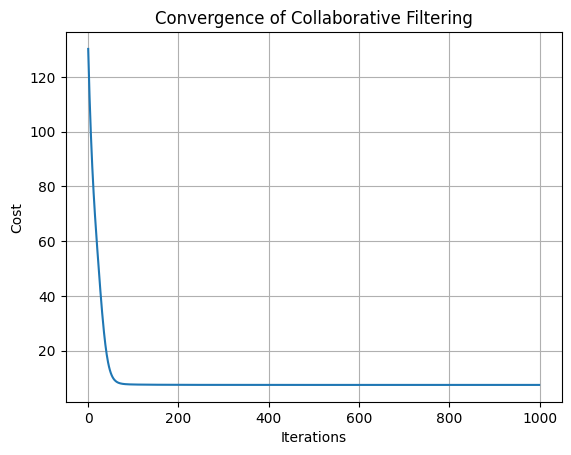

In [31]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Collaborative Filtering")
plt.grid(True)
plt.show()

## 向量化：低秩矩阵分解

上面的例子还可以进一步衍生：
1. 当给出一件产品时，能否找到与之相关的其它产品；
2. 一位用户最近看上一件产品，有没有其它相关的产品，可以推荐给他。

上面的例子已经找到的电影的特征向量，那么就可以找到其他的电影和某个既定的电影类似（譬如求欧氏距离），向用户做推荐了。

## 推行工作上的细节：均值归一化
假设新来了一个用户，还没有为任何电影评分，应该如何向他推荐电影？

回到刚才的用户评分数据：
$$
Y = 
\begin{bmatrix}
5 & 5 & 0 & 0 & ? \\
5 & ? & ? & 0 & ? \\
? & 4 & 0 & ? & ? \\
0 & 0 & 5 & 4 & ? \\
0 & 0 & 5 & 0 & ? \\
\end{bmatrix}
$$

我们首先需要对结果$Y$矩阵进行均值归一化处理，将每一个用户对某一部电影的评分减去所有用户对该电影评分的平均值,然后我们利用这个新的$Y$矩阵来训练算法

$$Y = 
\begin{bmatrix}
5 & 5 & 0 & 0 & ? \\
5 & ? & ? & 0 & ? \\
? & 4 & 0 & ? & ? \\
0 & 0 & 5 & 4 & ? \\
0 & 0 & 5 & 0 & ? \\
\end{bmatrix}  
$$

所有用户平均评分向量：

$$
\mu = 
\begin{bmatrix}
2.5 \\
2.5 \\
2 \\
2.25 \\
1.25 \\
\end{bmatrix}
$$

均值调整后的矩阵：
$$
\tilde{Y} = 
\begin{bmatrix}
2.5 & 2.5 & -2.5 & -2.5 & ? \\
2.5 & ? & ? & -2.5 & ? \\
? & 2 & -2 & ? & ? \\
-2.25 & -2.25 & 2.75 & 1.75 & ? \\
-1.25 & -1.25 & 3.75 & -1.25 & ? \\
\end{bmatrix}
$$

我们的新模型会认为她给每部电影的评分都是该电影的平均分。